In [9]:
# Importing Libraries
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, auc, roc_curve
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import os
import joblib

In [2]:
# Reading in the parsed data
df = pd.read_csv('/Users/chloe/Desktop/NUS/Year 4/dsa4262/DSA4262_gartic/Data/processed_data.csv')
train_data  = pd.read_csv('/Users/chloe/Desktop/NUS/Year 4/dsa4262/DSA4262_gartic/Data/train_data.csv')
test_data  = pd.read_csv('/Users/chloe/Desktop/NUS/Year 4/dsa4262/DSA4262_gartic/Data/test_data.csv')
val_data  = pd.read_csv('/Users/chloe/Desktop/NUS/Year 4/dsa4262/DSA4262_gartic/Data/val_data.csv')

In [3]:
# Drop features that are not needed / redundant
# Split into X and y (Features and Label)
X_train = train_data.drop(columns=['label','gene_id','transcript_id','Key','gene_id_encoded'])
y_train = train_data['label']

X_val = val_data.drop(columns=['label','gene_id','transcript_id','Key','gene_id_encoded'])
y_val = val_data['label']

X_test = test_data.drop(columns=['label','gene_id','transcript_id','Key','gene_id_encoded'])
y_test = test_data['label']

In [4]:
# Addressing class imbalance in the Dataset using SMOTE + class weight + scale
# More Positive cases than Negative Cases

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [5]:
# Begin Training the Model
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_resampled, y_train_resampled)
print("Random Forest Model has finished training")

Random Forest Model has finished training


In [6]:
# Running on validation data
val_predictions = rf.predict(X_val_scaled)
val_probabilities = rf.predict_proba(X_val_scaled)[:, 1]
val_accuracy = accuracy_score(y_val, val_predictions)
val_roc_auc = roc_auc_score(y_val, val_probabilities)

print(f'Validation ROC AUC Score: {val_roc_auc:.2f}')
print(f'Validation Accuracy Score: {val_accuracy:.2f}')

Validation ROC AUC Score: 0.87
Validation Accuracy Score: 0.94


In [11]:
# Calculate the ROC curve for validation data
fpr_val, tpr_val, thresholds_val = roc_curve(y_val, val_probabilities)

# Calculate AUC for validation data
roc_auc_val = auc(fpr_val, tpr_val)

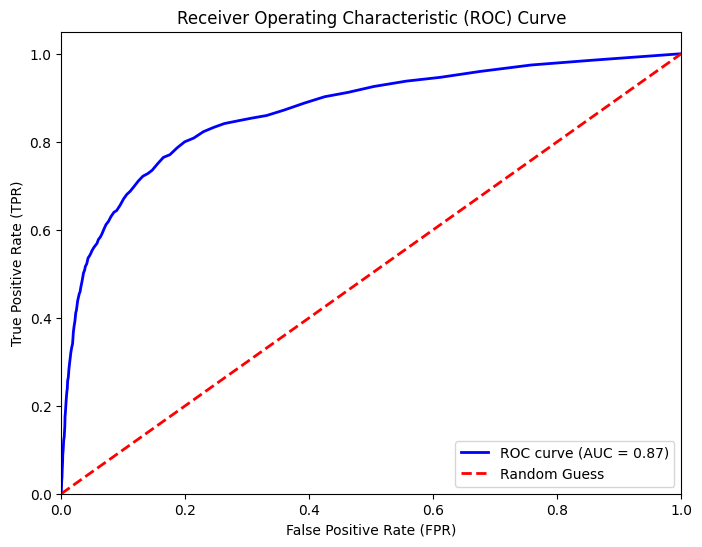

In [12]:
# Plot ROC curve for validation data
plt.figure(figsize=(8, 6))
plt.plot(fpr_val, tpr_val, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.2f})')

# Plot diagonal (random performance)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [15]:
# Running on test data
test_predictions = rf.predict(X_test_scaled)
test_probabilities = rf.predict_proba(X_test_scaled)[:, 1]
test_accuracy = accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_probabilities)

print(f"Test ROC AUC: {test_roc_auc:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

Test ROC AUC: 0.88
Test Accuracy: 0.94


In [16]:
# Calculate the ROC curve for test data
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, test_probabilities)

# Calculate AUC for test data
roc_auc_test = auc(fpr_test, tpr_test)

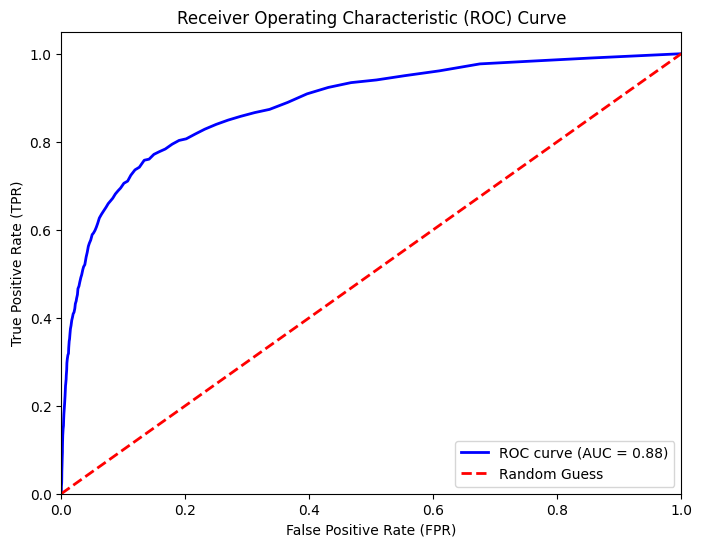

In [18]:
# Plot ROC curve for test data
plt.figure(figsize=(8, 6))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc_test:.2f})')

# Plot diagonal (random performance)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')

# Labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Show the plot
plt.show()

In [9]:
# Saving the trained Model
dirname = os.path.dirname(__name__) # Path to this train.py
filename = os.path.join(dirname, '../model/RF_updated.joblib') # Relative path to model folder
joblib.dump(rf, filename, compress=9)

['../model/RF_updated.joblib']

In [10]:
# Saving Standard Scaler for future Predictions
filename2 = os.path.join(dirname, '../model/RF_scaler.joblib') # Relative path to model folder
joblib.dump(scaler, filename2)

print("Random Forest Model has been saved, training script has finished running.")

Random Forest Model has been saved, training script has finished running.
